In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [27]:
df = pd.read_csv('data/HepatitisCdata1.csv')
df 

,Unnamed,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [28]:
df.describe()

,Unnamed,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Unnamed   615 non-null    int64  
 1   Category  615 non-null    object 
 2   Age       615 non-null    int64  
 3   Sex       615 non-null    object 
 4   ALB       614 non-null    float64
 5   ALP       597 non-null    float64
 6   ALT       614 non-null    float64
 7   AST       615 non-null    float64
 8   BIL       615 non-null    float64
 9   CHE       615 non-null    float64
 10  CHOL      605 non-null    float64
 11  CREA      615 non-null    float64
 12  GGT       615 non-null    float64
 13  PROT      614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [30]:
df.isnull()

,Unnamed,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,True,False,False,False,False,False,False,False,False


<AxesSubplot:xlabel='Sex', ylabel='count'>

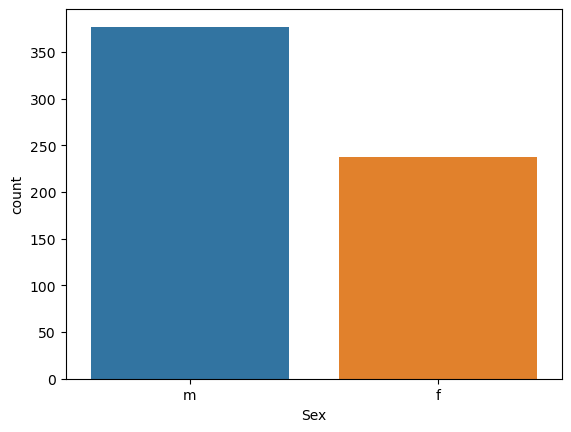

In [31]:
sns.countplot(x='Sex', data=df)

In [32]:
A = df['Category'].value_counts()
A

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [33]:
B = df['Age'].value_counts()
B

46    32
48    28
33    25
51    24
52    22
50    21
49    21
35    21
38    20
53    20
37    20
43    20
44    20
47    20
56    20
45    19
34    19
59    18
32    17
57    16
36    16
41    16
39    15
40    14
55    14
42    13
54    12
60    12
58    10
61     9
64     9
62     8
65     8
63     6
68     4
66     4
67     3
70     3
71     3
76     2
74     2
29     2
77     1
19     1
23     1
25     1
27     1
30     1
75     1
Name: Age, dtype: int64

In [65]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [58]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [49]:
np.isnan(df.any()) #and gets False
np.isfinite(df.all()) #and gets True

np.any(np.isnan(df))

np.all(np.isfinite(df))

False

In [67]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Category'] = df.Unnamed.astype("category").cat.codes

In [60]:
label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [77]:
from sklearn.model_selection import train_test_split

X = df.drop('Sex', axis=1)
y = df.Sex

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [79]:
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    183.0  247.0       1.0      430.0         430.0
_______________________________________________
Confusion Matrix: 
 [[183   0]
 [  0 247]]

Test Result:
Accuracy Score: 94.05%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.907407    0.954198  0.940541    0.930803      0.940288
recall      0.890909    0.961538  0.940541    0.926224      0.940541
f1-score    0.899083    0.957854  0.940541    0.928468      0.940382
support    55.000000  130.000000  0.940541  185.000000    185.000000
_______________________________________________
Conf

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 99.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.995968  0.997674    0.997984      0.997684
recall       0.994536    1.000000  0.997674    0.997268      0.997674
f1-score     0.997260    0.997980  0.997674    0.997620      0.997674
support    183.000000  247.000000  0.997674  430.000000    430.000000
_______________________________________________
Confusion Matrix: 
 [[182   1]
 [  0 247]]

Test Result:
Accuracy Score: 94.05%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.907407    0.954198  0.940541    0.930803      0.940288
recall      0.

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    183.0  247.0       1.0      430.0         430.0
_______________________________________________
Confusion Matrix: 
 [[183   0]
 [  0 247]]

Test Result:
Accuracy Score: 95.68%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.943396    0.962121  0.956757    0.952759      0.956554
recall      0.909091    0.976923  0.956757    0.943007      0.956757
f1-score    0.925926    0.969466  0.956757    0.947696      0.956521
support    55.000000  130.000000  0.956757  185.000000    185.000000
_______________________________________________
Conf

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    183.0  247.0       1.0      430.0         430.0
_______________________________________________
Confusion Matrix: 
 [[183   0]
 [  0 247]]

Test Result:
Accuracy Score: 96.76%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.962264    0.969697  0.967568    0.965981      0.967487
recall      0.927273    0.984615  0.967568    0

In [83]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    183.0  247.0       1.0      430.0         430.0
_______________________________________________
Confusion Matrix: 
 [[183   0]
 [  0 247]]

Test Result:
Accuracy Score: 96.76%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.962264    0.969697  0.967568    0.965981      0.967487
recall      0.927273    0.984615  0.967568    

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [85]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(random_state= 42)
tr.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=42)

In [86]:
tr.score(X_train, y_train)*100

100.0

In [87]:
y_pred = tr.predict(X_test)
accuracy_score(y_pred, y_test)*100

93.4959349593496

In [88]:
tr = SVC(C = 1.0, kernel = 'linear')
tr.fit(X_train, y_train)

SVC(kernel='linear')

In [89]:
y_pred = tr.predict(X_test)
accuracy_score(y_pred, y_test)*100

86.99186991869918

In [90]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

D:\Programs\A\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)*100

86.1788617886179

In [92]:
ac = neighbors.KNeighborsClassifier(n_neighbors=10)
ac.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

In [93]:
y_pred = ac.predict(X_test)
accuracy_score(y_pred, y_test)*100

D:\Programs\A\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


87.8048780487805

In [94]:
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [95]:
y_pred = rf.predict(X_test)
accuracy_score(y_pred, y_test)*100

93.4959349593496

In [96]:
score = cross_val_score(tr, X, y, cv = 10)
score.mean()*100

91.97250132205183

89.47368421052632

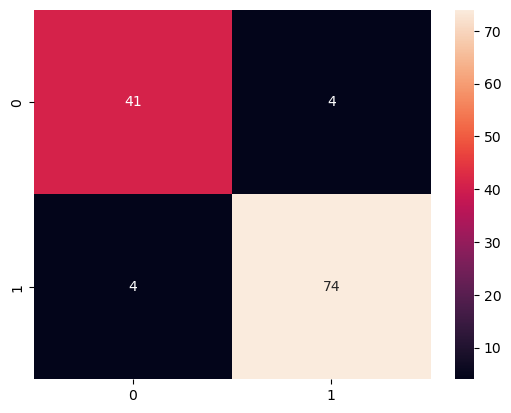

In [97]:
sns.heatmap(confusion_matrix(rf.predict(X_test), y_test),annot=True)
f1_score(tr.predict(X_test), y_test)*100